<a href="https://colab.research.google.com/github/menobleknight/using-python-for-research/blob/main/week-3-part-2/language-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Case Study: Language Processing`
- [`English and French Books`](https://courses.edx.org/assets/courseware/v1/1d1e264f416e27b22a0b8c970d52f3e3/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/Books_EngFr.zip)
- [`German and Portuguese Books`](https://courses.edx.org/assets/courseware/v1/9ae1e86b60c734de6665509f7fff25ae/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/Books_GerPort.zip)

In [120]:
text = "This is my test text. We're keeping this text short to keep things manageable."

def count_words(text):
    word_counts = {}
    for word in text.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

count_words(text)

{'This': 1,
 "We're": 1,
 'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable.': 1,
 'my': 1,
 'short': 1,
 'test': 1,
 'text': 1,
 'text.': 1,
 'things': 1,
 'this': 1,
 'to': 1}

In [121]:
text = "This is my test text. We're keeping this text short to keep things manageable."

def count_words(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for char in skips:
        text = text.replace(char, "")

    word_counts = {}
    for word in text.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

count_words(text)

{'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'test': 1,
 'text': 2,
 'things': 1,
 'this': 2,
 'to': 1,
 'were': 1}

In [122]:
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    punctuations = [".", ",", ";", ":", "'", '"', "?"] # to skip punctuations in the text
    for char in punctuations:
        text = text.replace(char, "")
        
    word_counts = Counter(text.split())

    return word_counts

count_words_fast(text)

Counter({'is': 1,
         'keep': 1,
         'keeping': 1,
         'manageable': 1,
         'my': 1,
         'short': 1,
         'test': 1,
         'text': 2,
         'things': 1,
         'this': 2,
         'to': 1,
         'were': 1})

In [123]:
count_words(text) == count_words_fast(text)

True

In [124]:
def read_book(book_path):
    import urllib, bs4
    text = []
    book_path = urllib.parse.quote(book_path, safe="/:") # don't encode '/' and ':'
    with urllib.request.urlopen(book_path) as book:
        for line in bs4.BeautifulSoup(book)('td'):
            if len(line) > 0:
                text.append(line.contents[0].strip())

    text = ' '.join(text)
    return text

book_path = "https://github.com/menobleknight/using-python-for-research/blob/main/week-3-part-2/books/english/shakespeare/Romeo-and-Juliet.txt"
text = read_book(book_path) # Romeo and Juliet (English)
len(text)

159276

In [125]:
index = text.find("What's in a name?") # famous line in Romeo and Juliet
index

40345

In [126]:
sample_text = text[index : index+1000]
sample_text

"What's in a name? That which we call a rose By any other name would smell as sweet. So Romeo would, were he not Romeo call'd, Retain that dear perfection which he owes Without that title. Romeo, doff thy name; And for that name, which is no part of thee, Take all myself.  Rom. I take thee at thy word. Call me but love, and I'll be new baptiz'd; Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night, So stumblest on my counsel?  Rom. By a name I know not how to tell thee who I am. My name, dear saint, is hateful to myself, Because it is an enemy to thee. Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words Of that tongue's utterance, yet I know the sound. Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore? The orchard walls are high and hard to climb, And the place death, considering who thou art, If any of my kinsmen find thee 

In [127]:
def word_stats(word_counts):
    num_unique = len(word_counts) # number of unique words
    counts = word_counts.values() # frequency of each unique word
    return (num_unique, counts) 

word_counts = count_words_fast(text) # text from 'Romeo and Juliet (English)' book
(num_unique, counts) = word_stats(word_counts)

In [128]:
num_unique

4709

In [129]:
sum(counts) # total number of words

28981

In [130]:
book_path = "https://github.com/menobleknight/using-python-for-research/blob/main/week-3-part-2/books/german/shakespeare/Romeo-und-Julia.txt"
text = read_book(book_path) # Romeo and Juliet (German)
len(text)

142281

In [131]:
word_counts = count_words_fast(text) # text from 'Romeo and Juliet (German)' book
(num_unique, counts) = word_stats(word_counts)

In [132]:
num_unique

5868

In [133]:
sum(counts)

23355

In [134]:
initial = "https://github.com/menobleknight/using-python-for-research/blob/main/week-3-part-2" # initial path

# list of paths for each book
paths = ['./books/portuguese/dinis/A-Morgadinha-dos-Cannaviaes.txt', './books/portuguese/dinis/Os-fidalgos-da-Casa-Mourisca.txt', './books/portuguese/dinis/Uma-fam°lia-ingleza.txt', "./books/portuguese/branco/A-Queda-d'um-Anjo.txt", './books/portuguese/branco/Scenas-Contemporaneas.txt', './books/portuguese/branco/Agulha-em-Palheiro.txt', './books/portuguese/branco/Carlota-Angela.txt', './books/portuguese/branco/Annos-de-Prosa.txt', './books/portuguese/branco/Amor-de-Perdição.txt', './books/portuguese/branco/Estrellas-Funestas.txt', './books/portuguese/branco/O-Olho-de-Vidro.txt', './books/portuguese/branco/Amor-de-Salvação.txt', './books/portuguese/branco/O-Regicida.txt', './books/portuguese/branco/O-que-fazem-mulheres.txt', './books/portuguese/branco/A-Filha-do-Arcediago.txt', './books/portuguese/branco/Estrellas-Prop°cias.txt', './books/portuguese/branco/Livro-d-Consolação.txt', './books/portuguese/branco/A-Neta-do-Arcediago.txt', './books/portuguese/branco/Lagrimas-Abenáoadas.txt', './books/portuguese/queirós/O-Primo-Bazilio.txt', './books/portuguese/queirós/A-Illustre-Casa-de-Ramires.txt', './books/portuguese/queirós/A-Rel°quia.txt', './books/portuguese/queirós/Os-Maias.txt', './books/portuguese/queirós/O-crime-do-padre-Amaro.txt', './books/portuguese/queirós/O-Mandarim.txt', './books/portuguese/queirós/A-correspondància-de-Fradique-Mendes.txt', './books/portuguese/queirós/Cartas-de-Inglaterra.txt', './books/portuguese/queirós/A-Cidade-e-as-Serras.txt', './books/portuguese/shakespeare/Hamlet.txt', './books/french/sand/La-Marquise.txt', './books/french/sand/Pauline.txt', './books/french/sand/Metella.txt', './books/french/sand/Le-poâme-de-Myrza.txt', './books/french/sand/Jacques-le-fataliste-et-son-maåtre.txt', './books/french/sand/Oeuvres-illustrÇes-de-George-Sand.txt', './books/french/sand/Mattea.txt', "./books/french/sand/L' Orco.txt", './books/french/sand/Le-Piccinino.txt', './books/french/sand/cora.txt', './books/french/sand/La-Coupe-Lupo-Liverani-Le-Toast-Garnier-Le-Contrebandier-La-Ràverie-Ö-Paris.txt', "./books/french/diderot/Entretien-d'un-päre-avec-ses-enfants.txt", './books/french/diderot/Les-deux-amis-de-Bourbonne.txt', "./books/french/diderot/L'oiseau-blanc.txt", './books/french/diderot/Regrets-sur-ma-vieille-robe-de-chambre.txt', "./books/french/diderot/Ceci-n'est-pas-un-conte.txt", './books/french/de-maupassant/La-Main-Gauche.txt', './books/french/de-maupassant/La-petite-roque.txt', "./books/french/de-maupassant/L'inutile-beautÇ.txt", './books/french/de-maupassant/Le-Horla.txt', './books/french/de-maupassant/Boule-de-Suif.txt', './books/french/de-maupassant/Œuvres-complètes-de-Guy-de-Maupassant.txt', './books/french/de-maupassant/La-Maison-Tellier.txt', './books/french/de-maupassant/Claire-de-Lune.txt', './books/french/de-maupassant/Contes-de-la-Becasse.txt', './books/french/chevalier/La-fille-du-pirate.txt', "./books/french/chevalier/L'enfer-et-le-paradis-de-l'autre-monde.txt", './books/french/chevalier/La-fille-des-indiens-rouges.txt', "./books/french/chevalier/L'åle-de-sable.txt", './books/french/chevalier/Le-chasseur-noir.txt', './books/french/chevalier/La-capitaine.txt', './books/french/chevalier/Les-derniers-Iroquois.txt', './books/german/lessing/emilia-galotti.txt', './books/german/lessing/hamburgische-dramaturgie.txt', './books/german/lessing/der-junge-gelehrte.txt', './books/german/lessing/die-juden.txt', './books/german/lessing/der-freigeist.txt', './books/german/lessing/philotas.txt', './books/german/lessing/miss-sara-sampson.txt', './books/german/lessing/minna-von-barnhelm.txt', './books/german/schiller/Der-Parasit-oder-die-Kunst-sein-GlÅck-zu-machen.txt', './books/german/schiller/Die-Huldigung-der-KÅnste.txt', './books/german/schiller/die-braut-von-messina.txt', './books/german/schiller/Der-Neffe-als-Onkel.txt', './books/german/schiller/Turandot-Prinzessin-von-China.txt', './books/german/schiller/Die-Jungfrau-von-Orleans.txt', './books/german/schiller/Wallensteins-Lager.txt', './books/german/schiller/Kabale-und-Liebe.txt', './books/german/schiller/Die-Verschwîrung-des-Fiesco-zu-Genua.txt', './books/german/schiller/Die-Piccolomini.txt', './books/german/schiller/Wallensteins-Tod.txt', './books/german/raimund/Der-Diamant-des-Geisterkînigs.txt', './books/german/raimund/Die-unheilbringende-Krone.txt', './books/german/raimund/Moisasurs-Zauberfluch.txt', './books/german/raimund/Das-MÑdchen-aus-der-Feenwelt.txt', './books/german/raimund/Der-Alpenkînig-und-der-Menschenfeind.txt', './books/german/raimund/Die-gefesselte-Phantasie.txt', './books/german/raimund/Der-Barometermacher-auf-der-Zauberinsel.txt', './books/german/raimund/Der-Verschwender.txt', './books/german/shakespeare/Richard-III.txt', './books/german/shakespeare/Othello.txt', './books/german/shakespeare/Hamlet.txt', './books/german/shakespeare/Macbeth.txt', './books/german/shakespeare/Romeo-und-Julia.txt', './books/german/shakespeare/Ein-Sommernachtstraum.txt', './books/german/shakespeare/Der-Kaufmann-von-Venedig.txt', './books/english/shakespeare/Richard-III.txt', './books/english/shakespeare/The-Merchant-of-Venice.txt', './books/english/shakespeare/Romeo-and-Juliet.txt', './books/english/shakespeare/Othello.txt', "./books/english/shakespeare/A-Midsummer-Night's-Dream.txt", './books/english/shakespeare/Hamlet.txt', './books/english/shakespeare/Macbeth.txt']

len(paths)

102

In [135]:
import pandas as pd

table = pd.DataFrame(columns=("name", "age"))

table.loc[1] = "James", 22
table.loc[2] = "Jess", 32

table

,name,age
1,James,22
2,Jess,32


In [136]:
stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique words"))

for row, path in enumerate(paths, start=1):
    book_path = (initial + path.lstrip('.'))
    text = read_book(book_path)

    word_counts = count_words_fast(text)
    (num_unique, counts) = word_stats(word_counts)

    language, author, title = path.split("/")[2:] # exclude '.' and 'books' from path

    language = language.capitalize()
    author = author.capitalize()
    title = ' '.join(title[:-4].split('-')) # exclude '.txt' from title
    # OR title = title.replace("-", " ").replace(".txt", "")

    stats.loc[row] = language, author, title, sum(counts), num_unique

stats 

,language,author,title,length,unique words
1,Portuguese,Dinis,A Morgadinha dos Cannaviaes,148778,20860
2,Portuguese,Dinis,Os fidalgos da Casa Mourisca,144502,18477
3,Portuguese,Dinis,Uma fam°lia ingleza,121976,18668
4,Portuguese,Branco,A Queda d'um Anjo,52958,12813
5,Portuguese,Branco,Scenas Contemporaneas,53291,11671
...,...,...,...,...,...
98,English,Shakespeare,Romeo and Juliet,28981,4709
99,English,Shakespeare,Othello,27383,4036
100,English,Shakespeare,A Midsummer Night's Dream,16972,3231
101,English,Shakespeare,Hamlet,29575,4796


In [137]:
stats.head()

,language,author,title,length,unique words
1,Portuguese,Dinis,A Morgadinha dos Cannaviaes,148778,20860
2,Portuguese,Dinis,Os fidalgos da Casa Mourisca,144502,18477
3,Portuguese,Dinis,Uma fam°lia ingleza,121976,18668
4,Portuguese,Branco,A Queda d'um Anjo,52958,12813
5,Portuguese,Branco,Scenas Contemporaneas,53291,11671


In [138]:
stats.tail()

,language,author,title,length,unique words
98,English,Shakespeare,Romeo and Juliet,28981,4709
99,English,Shakespeare,Othello,27383,4036
100,English,Shakespeare,A Midsummer Night's Dream,16972,3231
101,English,Shakespeare,Hamlet,29575,4796
102,English,Shakespeare,Macbeth,17718,3557


In [139]:
# accessing columns by column-name
stats.columns

Index(['language', 'author', 'title', 'length', 'unique words'], dtype='object')

In [140]:
stats.length # 1st way - using dot notation

1      148778
2      144502
3      121976
4       52958
5       53291
        ...  
98      28981
99      27383
100     16972
101     29575
102     17718
Name: length, Length: 102, dtype: object

In [141]:
stats['unique words'] # 2nd way - using brackets

1      20860
2      18477
3      18668
4      12813
5      11671
       ...  
98      4709
99      4036
100     3231
101     4796
102     3557
Name: unique words, Length: 102, dtype: object

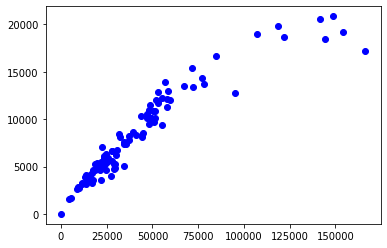

In [142]:
# plotting the data

import matplotlib.pyplot as plt

plt.plot(stats['length'], stats['unique words'], 'bo'); # 'bo' - blue circles

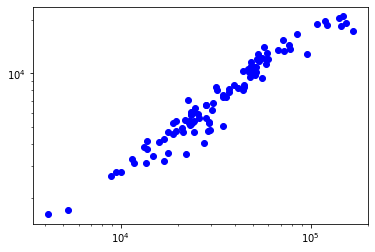

In [143]:
# plot where x and y axis are logarithmic
plt.loglog(stats['length'], stats['unique words'], 'bo'); # 'bo' - blue circles

In [144]:
stats[stats.language == "English"] # only rows where language is English

,language,author,title,length,unique words
96,English,Shakespeare,Richard III,34745,5034
97,English,Shakespeare,The Merchant of Venice,21951,3529
98,English,Shakespeare,Romeo and Juliet,28981,4709
99,English,Shakespeare,Othello,27383,4036
100,English,Shakespeare,A Midsummer Night's Dream,16972,3231
101,English,Shakespeare,Hamlet,29575,4796
102,English,Shakespeare,Macbeth,17718,3557


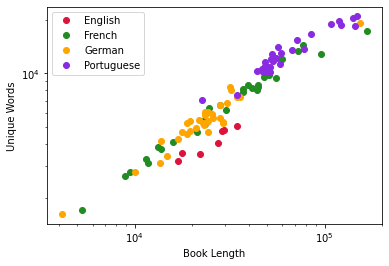

In [145]:
english = stats[stats.language == "English"]
plt.loglog(english['length'], english['unique words'], "o", label="English", color="crimson");

french = stats[stats.language == "French"]
plt.loglog(french['length'], french['unique words'], "o", label="French", color="forestgreen");

german = stats[stats.language == "German"]
plt.loglog(german['length'], german['unique words'], "o", label="German", color="orange");

portuguese = stats[stats.language == "Portuguese"]
plt.loglog(portuguese['length'], portuguese['unique words'], "o", label="Portuguese", color="blueviolet");

plt.legend();
plt.xlabel("Book Length");
plt.ylabel("Unique Words");